#Explanatory Data Analysis


This is an **open question**. This question is graded by: Rigor and thoroughness of data analysis; Creative representation of analysis results. 

Suppose your boss asks you to explore and analyze the datasets and answer the following questions. 

(a)   What can you find from the exploratory data analysis?

Hint: To help you get some ideas, you must first answer the following questions.

-       What is the total number of reviews and average review sentiment per zip code?

-       What is the total number of reviews and average review sentiment per year?

-       Which reviewer (reviewer id) posts the maximum number of reviews? And what is the maximum value? 

Next, you need to come up with your own exploratory data analysis.

Use what we learned from class to get a good sense of the datasets.

You need to combine the two datasets to understand the data more deeply.

You can also conduct data visualization to understand the data better.

 

(b)  What affects the review sentiments?

Hint: Run Linear Regression Model to find what affects the review sentiments. You need to interpret the results and see how robust your results are. You can write your findings in markdown cells.

It is possible to get a low R square value in real-world data.

When taking the logarithm of a number, the number must be positive. If not, you can add a constant to the number to make it positive and then take the logarithm.

#PART - A) Explanatory Data Analysis

##1. Importing data and combining the datasets

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving listing_nc_asheville.csv to listing_nc_asheville.csv


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving review_nc_asheville.csv to review_nc_asheville.csv


In [ ]:
import pandas as pd
listing = pd.read_csv('listing_nc_asheville.csv', na_values= '?')
review = pd.read_csv('review_nc_asheville.csv', na_values= '?')

**Outer joining both data sets using listing_id**

In [ ]:
airbnb = pd.merge(listing, review, on = 'listing_id', how = 'outer')

##2. Cleaning the data

* **Changing the data type of variable date from object to datetime.**





In [ ]:
airbnb['date'] = airbnb['date'].astype('datetime64[ns]')


* **Remove rows with all values null**

In [ ]:
airbnb.isnull().sum()

listing_id                      0
zipcode                      2366
latitude                        0
longitude                       0
property_type                   0
room_type                       0
bathrooms                    1356
bedrooms                       89
beds                           28
minimum_nights                  0
host_listings_count             0
instant_bookable                0
cancellation_policy          1349
is_business_travel_ready    11066
price_per_person                0
host_is_superhost               0
review_id                    2725
date                         2725
reviewer_id                  2725
reviewer_name                2725
sentiment                    2725
dtype: int64

In [ ]:
import numpy as np 
airbnb['test'] = np.NAN
airbnb.shape
#to test if our dropna code is working

(150064, 22)

In [ ]:
airbnb.dropna(axis = 1, how = 'all',inplace = True)
#no entire row seems to have all missing values

* **Find duplicates and drop them**

In [ ]:
airbnb.drop_duplicates(inplace = True)
airbnb.shape

(150064, 21)

##3. Analysis

* Total number of reviews = 147339

###What is the total number of reviews and average review sentiment per zip code?

**Inferences**
* Found the average review sentiment per zip code. 28815 has the highest average and 28730 the lowest.

* 28730 has the lowest number of reviews while 28806 has the highest number of reviews.
* Rendered a scatter plot between zipcode and average review sentiment with normalized review count as the marker point size.
* This data can be used to enhance/relax background check or inspection frequencies for lsitings. Additionally we can also use this data to come up with discounts or promotions. Example: Encourage newer listings in zips where average review sentiment is low while number of reviews is high (high demand but low supply)






    zipcode  avg_review_sentiment  total_review  normalizedReview
0   28701.0              0.366561            20          0.410523
1   28704.0              0.382080          4155         85.286169
2   28715.0              0.365012          2499         51.294858
3   28730.0              0.233937             4          0.082105
4   28732.0              0.392760          1691         34.709726
5   28748.0              0.353509           170          3.489446
6   28759.0              0.327566           100          2.052615
7   28787.0              0.355056            59          1.211043
8   28801.0              0.376376         39344        807.580993
9   28803.0              0.389715         18530        380.349629
10  28804.0              0.377612         15666        321.562725
11  28805.0              0.376374         17131        351.633540
12  28806.0              0.384278         46772        960.049263
13  28815.0              0.437491            14          0.287366


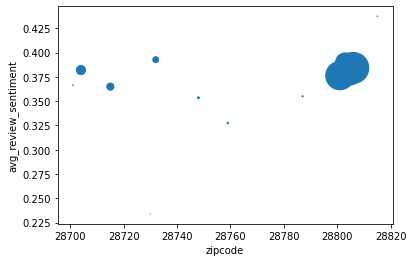

In [ ]:
CountTotalReviewsByZipcode = airbnb.groupby('zipcode')[['review_id']].count()
CountTotalReviewsByZipcode.rename(columns={'review_id': 'total_review'}, inplace=True)
AvgRevSentimentPerZipcode = airbnb.groupby('zipcode')[['sentiment']].mean()
AvgRevSentimentPerZipcode.rename(columns={'sentiment': 'avg_review_sentiment'}, inplace=True)
reviews_and_sentiments_zipcode = pd.merge(AvgRevSentimentPerZipcode, CountTotalReviewsByZipcode, on = 'zipcode', how = 'outer')
reviews_and_sentiments_zipcode = reviews_and_sentiments_zipcode[reviews_and_sentiments_zipcode['avg_review_sentiment'].notna()]
reviews_and_sentiments_zipcode.reset_index(inplace=True)
Sum_review = reviews_and_sentiments_zipcode['total_review'].sum()
reviews_and_sentiments_zipcode['normalizedReview'] = reviews_and_sentiments_zipcode['total_review']*3000/Sum_review
print(reviews_and_sentiments_zipcode)
reviews_and_sentiments_zipcode.plot.scatter(x = 'zipcode', y = 'avg_review_sentiment',  s= 'normalizedReview', colormap='jet')

###Which reviewer (reviewer id) posts the maximum number of reviews? And what is the maximum value? 
**Inferences**
* Found the total number of reviews from each reviewer.
* Reviewer 20741182 (reviewer_id) has the maximum reviews. They've posted 43 times.
* This data can be used to order reviews on the app - Reviews from users that post more can be shown above. This can further be improved by comparing each review sentiment against the average review sentiment per listing. The closer a review sentiment is to the average, the more the reputation for the reviewer.
* We can use this data to also give discounts to active users and honor reviewers with badges as token of recognition.

In [ ]:
MaxReviewsByReviewers = airbnb.groupby('reviewer_id')[['review_id']].count()
MaxReviewsByReviewers.rename(columns={'review_id': 'number_of_reviews'}, inplace=True)
print(MaxReviewsByReviewers)
max_reviewer = MaxReviewsByReviewers.loc[MaxReviewsByReviewers['number_of_reviews'].idxmax()]
print(max_reviewer)

             number_of_reviews
reviewer_id                   
61.0                         1
860.0                        1
899.0                        1
2392.0                       1
2845.0                       1
...                        ...
232523771.0                  1
232548149.0                  1
232804459.0                  1
232852229.0                  1
233176951.0                  1

[131758 rows x 1 columns]
number_of_reviews    43
Name: 20741182.0, dtype: int64


###Which is the zipcode in Ashville with most number of listings in Airbnb?

**Inferences**
* Zipcode 28806 has the most listings in Asheville
* This data can help in understanding the supply aspect of the airbnb problem. Higher the listings in a zipcode, more the choices for customers.
* We can also use this to adjust our pricing models. A listing with high review sentiment in a zipcode that has low number of listings can be priced high.

4039
         num_uniq_listings  percentTotal
zipcode                                 
28701.0                  4      0.000990
28704.0                212      0.052488
28715.0                101      0.025006
28730.0                  2      0.000495
28732.0                 98      0.024263
28736.0                  1      0.000248
28748.0                  8      0.001981
28759.0                  4      0.000990
28787.0                  4      0.000990
28801.0                915      0.226541
28803.0                558      0.138153
28804.0                503      0.124536
28805.0                429      0.106214
28806.0               1197      0.296360
28814.0                  1      0.000248
28815.0                  1      0.000248
29710.0                  1      0.000248


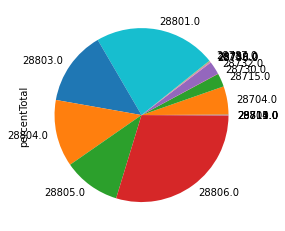

In [ ]:
airbnb_zip = airbnb[airbnb['zipcode'].notna()]
unique_listings = airbnb_zip['listing_id'].unique()
total_unique_listings = len(unique_listings)
print(total_unique_listings)
#There are 4039 unique listings in our dataset.
#count of unique listings per zipcode
CountUniqueListingsPerZipcode = airbnb.groupby('zipcode')[['listing_id']].nunique()
CountUniqueListingsPerZipcode.rename(columns={'listing_id': 'num_uniq_listings'}, inplace=True)
CountUniqueListingsPerZipcode['percentTotal'] = CountUniqueListingsPerZipcode['num_uniq_listings']/total_unique_listings
print(CountUniqueListingsPerZipcode)
CountUniqueListingsPerZipcode.plot(kind='pie', y = 'percentTotal',legend = None)

### What percentage of listings get at least 1 review? How does this data look for different zipcodes?

**Inferences**
* Found the ratio of listings with review to the total number of listings for each zip code.
* Zipcodes 28736, 28814 and 29710 all have 1 listing and none of them have a review.
* This data can be used to see where the feedback loop is high. In zip codes with large number of listing and low review ratio, Airbnb can send out surveys to users post their stay to collect feedback.

In [ ]:
#Dataframe of listings with reviews
WithReviewListings = airbnb[airbnb['review_id'].notna()]
#matches exactly with number of rows in the reviews dataframe
CountUniqueListingsWithReviewsPerZipcode = WithReviewListings.groupby('zipcode')[['listing_id']].nunique()
CountUniqueListingsWithReviewsPerZipcode.rename(columns={'listing_id': 'num_uniq_listings_with_reviews'}, inplace=True)
dfUtilization = pd.merge(CountUniqueListingsPerZipcode, CountUniqueListingsWithReviewsPerZipcode, on = 'zipcode', how = 'outer')
dfUtilization['ReviewedListings_To_Listings_Ratio'] = dfUtilization['num_uniq_listings_with_reviews']/dfUtilization['num_uniq_listings']
dfUtilization.drop('percentTotal', axis=1, inplace=True)
print(dfUtilization)

         num_uniq_listings  num_uniq_listings_with_reviews  \
zipcode                                                      
28701.0                  4                             1.0   
28704.0                212                           118.0   
28715.0                101                            61.0   
28730.0                  2                             1.0   
28732.0                 98                            44.0   
28736.0                  1                             NaN   
28748.0                  8                             4.0   
28759.0                  4                             2.0   
28787.0                  4                             2.0   
28801.0                915                           556.0   
28803.0                558                           337.0   
28804.0                503                           322.0   
28805.0                429                           283.0   
28806.0               1197                           764.0   
28814.0 

###Understand the correlation between various features and reason out how one affects the other

**Inferences**
* We see a high correlation between number of beds and bedrooms. This makes logical sense since higher bedrooms imply larger number of beds and vice versa.

* Number of bedrooms and number of bathrooms appear to have a high correlation as well.

* There is also a positive correlation between the number of listings from a host and the price per person for stay at the listing. This means that hosts that own multiple listings know the business well enough to charge more.

* There is a strong negative correlation between minimum nights for booking at a listing and the listing being instantly bookable. This shows that listings that have higher number of minumum nights require acknowledgement or background work from the host before the booking can be completed (hence not instant bookable).

* There is a also a negative correlation between number of beds at a listing and the host of the listing being a super host. One potential theory here is that listings with larger number of beds can cater to only a smaller customer base (needs to be large group). Hence, the number of reviews or bookings is also relatively smaller and it becomes harder for the host to establish their reputation. 
* One potential fix from Airbnb side could be to weight reviews based on number of beds offered. A review for a listing with 3 beds can be counted as 3 independent reviews for super host decision making.


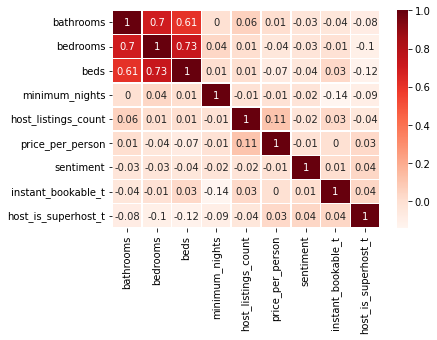

In [ ]:
numerical_airbnb = airbnb[['bathrooms','bedrooms','beds','minimum_nights','host_listings_count','price_per_person','sentiment','instant_bookable','is_business_travel_ready','host_is_superhost']]
numerical_airbnb = pd.get_dummies(data=numerical_airbnb, drop_first=True)
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
# plotting correlation heatmap
corr_heatmap = sb.heatmap(round(numerical_airbnb.corr(),2), cmap="Reds", annot=True, linewidths=.5,)
  
# displaying heatmap
mp.show()

###What is the impact of being a superhost on reviews and price?

**Inferences**

* The reviewers appear to be liking the listings slightly more if the host is a superhost. 
* The average price per person is also higher if the host is a superhost.
* The average sentiment not being totally skewed towards superhosts leads us to believe that the tag of "super host" does not completely come from sentiment of reviews.
* Airbnb can use this data to make more margins on hosts that are not super hosts yet but have similar average review sentiments as that of super hosts.

In [ ]:
reviews_of_superhosts = airbnb.groupby('host_is_superhost')[['sentiment','price_per_person']].mean()
reviews_of_superhosts.rename(columns={'sentiment': 'avg_sentiment'}, inplace=True)
print(reviews_of_superhosts)

                   avg_sentiment  price_per_person
host_is_superhost                                 
f                       0.366561         35.823969
t                       0.385475         39.632861


##Which geographical area has most number of listings and reviews?

**Inferences**
* The grid between latitude (35.55,35.6) and longitude (-82.6,-82.55) appear to be most populous with most number of listings. 
* The competition might be high for a new host listing their property in this area.
* Airbnb can use this data to better direct their ad campaigns in areas with less number of listings. This data can also be looked in conjunction with demand (proportion of reveiwed listings to total listings [found previously]) in order even further this study.

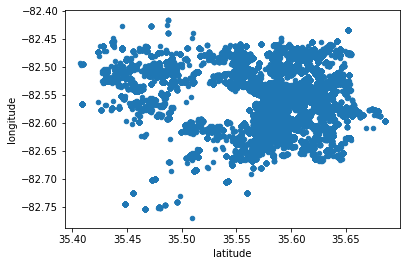

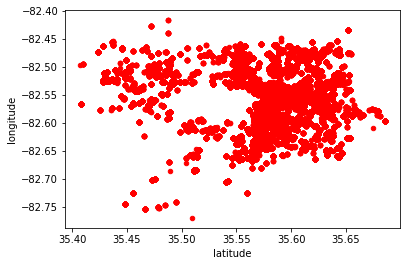

In [ ]:
geo_airbnb = airbnb[['longitude','latitude','price_per_person','sentiment']]
geo_airbnb.plot.scatter(x = 'latitude', y = 'longitude')
WithReviewListings.plot.scatter(x = 'latitude', y = 'longitude', color = 'red')

##What is the trend of review sentiment by zip codes over the years?

**Inferences**

* Found the trend of review sentiments over the years for each zipcode in the study.
* Drastic dips in review sentiments might be due to low number of listings and those determining the average for the zipcode. It could also be impacted by change in regulations imposed by district, town and country planning or Home Owners Association (HOA)
* Airbnb can drill down on anomalous patterns in these graphs to better strategize their business model for specific geographies.

    zipcode  review_year  avg_review_sentiment
0   28701.0       2017.0              0.347273
1   28701.0       2018.0              0.367576
2   28704.0       2012.0              0.450723
3   28704.0       2013.0              0.217429
4   28704.0       2014.0              0.382470
..      ...          ...                   ...
73  28806.0       2016.0              0.374902
74  28806.0       2017.0              0.379931
75  28806.0       2018.0              0.394382
76  28815.0       2017.0              0.410921
77  28815.0       2018.0              0.485316

[78 rows x 3 columns]


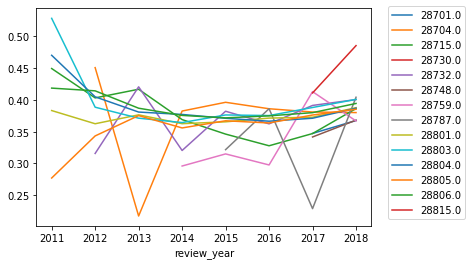

In [ ]:
import matplotlib.pyplot as plt
GroupByZipcodeAndYear = airbnb.groupby(['zipcode','review_year'])[['sentiment']].mean()
GroupByZipcodeAndYear.rename(columns={'sentiment': 'avg_review_sentiment'}, inplace=True)
GroupByZipcodeAndYear.reset_index(inplace=True)
print(GroupByZipcodeAndYear)
GroupByZipcodeAndYear.set_index('review_year', inplace=True)
GroupByZipcodeAndYear.groupby('zipcode')['avg_review_sentiment'].plot(legend=True)
plt.legend(loc=(1.05,.03))

###What is the total number of reviews and average review sentiment per year?
**Inferences**
* Found the total number of reviews per year. It shows a monotonically increasing trend. It goes on to say heuristically that the growth is exponential (Assuming the probability of renters writing a review is constant across years).

* Found the average review sentiment per year. There is a decreasing trend till 2014 and then the sentiment has been steadily increasing. This can be attributed to the sheer volume of users. After 2014, the number of reviews almost tripled.

* Rendered a timechart to show the trends. We can use these two graphs to understand the customer success and growth story of Airbnb. An increasing trend in number of reviews shows that the user base is growing, a decreasing trend in sentiment shows that the customer's are not happy. This could mean that customer's are still sticking to the platform due to a lack of option.

             avg_review_sentiment  total_reviews
review_year                                     
2011.0                   0.408427            130
2012.0                   0.378910            735
2013.0                   0.379679           2054
2014.0                   0.367379           5960
2015.0                   0.369193          15691
2016.0                   0.371065          23155
2017.0                   0.377564          39949
2018.0                   0.391170          59665


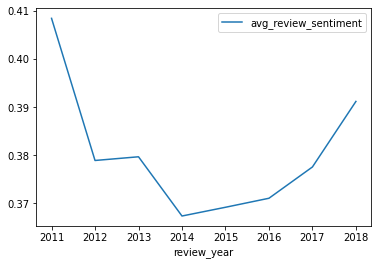

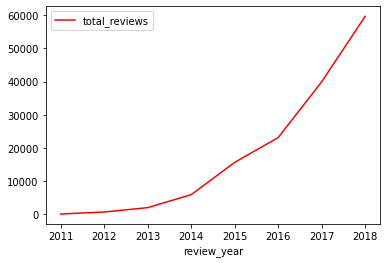

In [ ]:
#creating a column with review year
airbnb['review_year'] = airbnb['date'].dt.year
CountTotalReviewsByYear = airbnb.groupby('review_year')[['review_id']].count()
CountTotalReviewsByYear.rename(columns={'review_id': 'total_reviews'}, inplace=True)

AvgRevSentimentPerYear = airbnb.groupby('review_year')[['sentiment']].mean()
AvgRevSentimentPerYear.rename(columns={'sentiment': 'avg_review_sentiment'}, inplace=True)

reviews_and_sentiments_year = pd.merge(AvgRevSentimentPerYear, CountTotalReviewsByYear, on = 'review_year', how = 'outer')
print(reviews_and_sentiments_year)
reviews_and_sentiments_year.reset_index(inplace=True)
reviews_and_sentiments_year.plot.line(x= 'review_year', y = 'avg_review_sentiment')
reviews_and_sentiments_year.plot.line(x= 'review_year', y = 'total_reviews', color = 'red')

#PART - B) What affects the review sentiments?

**Findings on what affects review sentiments**

* The only variable which has a positive influence on the sentiments is whether the host is a superhost or not.
* Beds and bathrooms have a negative effect on the review sentiments. 
* Both of these observations tie back to our inference from correlation analysis done in previous question (we inferred that beds and bathroom have negative correlation with the host being superhost or not. The finding here is transitive.)
* The listing being instantly bookable does not affect review sentiments
* Number of bedrooms is insignificant under 95% confidence interval while being significant under 90% confidence.


In [ ]:
airbnb1 = airbnb.dropna(how='any')
airbnb1.shape
import statsmodels.api as sm
y=airbnb1['sentiment']
X=airbnb1[['bathrooms', 'bedrooms', 'beds','minimum_nights','host_listings_count','price_per_person','instant_bookable','is_business_travel_ready','host_is_superhost']]
X = pd.get_dummies(data=X, drop_first=True)
X=sm.add_constant(X)
model1 = sm.OLS(y, X) 
results1 = model1.fit()
results1.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     64.32
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          8.47e-106
Time:                        06:09:33   Log-Likelihood:                 33977.
No. Observations:              136517   AIC:                        -6.794e+04
Df Residuals:                  136508   BIC:                        -6.785e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3882      0.002    196.823      0.000       0.384       0.392
bathrooms              -0.0038      0.002     -2.513      0.012      -0.007      -0.001
bedrooms                0.0016      0.001      1.727      0.084      -0.000       0.003
beds                   -0.0050      0.001     -7.900      0.000      -0.006      -0.004
minimum_nights         -0.0003   4.64e-05     -7.108      0.000      -0.000      -0.000
host_listings_count    -0.0001   4.75e-05     -2.899      0.004      -0.000   -4.46e-05
price_per_person       -0.0002   2.06e-05     -8.304      0.000      -0.000      -0.000
instant_bookable_t     -0.0002      0.001     -0.230      0.818      -0.002       0.002
host_is_superhost_t     0.0170      0.001     13.822      0.000       0.015       0.019
==============================================================================
Omnibus:                    27100.612   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115886.825
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       7.118   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Taking Log for sentiment**

In [ ]:
import numpy as np 
airbnb1['sentimentLog'] = np.log(airbnb1['sentiment']+100)

y1=airbnb1['sentimentLog']
X1=airbnb1[['bathrooms', 'bedrooms', 'beds','minimum_nights','host_listings_count','price_per_person','instant_bookable','is_business_travel_ready','host_is_superhost']]
X1 = pd.get_dummies(data=X1, drop_first=True)
X1=sm.add_constant(X1)
model2 = sm.OLS(y1, X1) 
results2 = model2.fit()
results2.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sentimentLog   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     64.40
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          6.17e-106
Time:                        06:08:12   Log-Likelihood:             6.6330e+05
No. Observations:              136517   AIC:                        -1.327e+06
Df Residuals:                  136508   BIC:                        -1.326e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.6090   1.96e-05   2.35e+05      0.000       4.609       4.609
bathrooms           -3.778e-05    1.5e-05     -2.515      0.012   -6.72e-05   -8.34e-06
bedrooms             1.545e-05   8.94e-06      1.729      0.084   -2.06e-06     3.3e-05
beds                -4.935e-05   6.25e-06     -7.903      0.000   -6.16e-05   -3.71e-05
minimum_nights      -3.277e-06   4.62e-07     -7.101      0.000   -4.18e-06   -2.37e-06
host_listings_count -1.374e-06   4.73e-07     -2.906      0.004    -2.3e-06   -4.47e-07
price_per_person    -1.697e-06   2.05e-07     -8.296      0.000    -2.1e-06    -1.3e-06
instant_bookable_t  -2.503e-06   1.04e-05     -0.242      0.809   -2.28e-05    1.78e-05
host_is_superhost_t     0.0002   1.22e-05     13.845      0.000       0.000       0.000
==============================================================================
Omnibus:                    26565.141   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112032.222
Skew:                           0.909   Prob(JB):                         0.00
Kurtosis:                       7.048   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""